## 5. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
Zdata = 'AnalyticsDataZdata.csv'
Zdata = pd.read_csv(Zdata)

In [3]:
Zdata.head()

,Set,ID,Type,Optsol,LPSol,LagSol,CRank,BDSol,BDRCst,RBDSol,...,RBDSol8,RBDRCst8,BDSol9,BDRCst9,RBDSol9,RBDRCst9,BDSol10,BDRCst10,RBDSol10,RBDRCst10
0,S1,1,z_var,0,0.00,0.07,3,0,-145.89,0.0,...,0.00,145.91,0.0,307.34,0.00,145.85,NaN,NaN,NaN,NaN
1,S1,1,z_var,0,0.00,0.13,9,0,202.89,0.0,...,0.00,490.57,0.0,588.12,0.00,490.55,NaN,NaN,NaN,NaN
2,S1,1,z_var,1,0.77,1.00,1,0,-283.49,0.4,...,0.71,0.00,1.0,213.00,0.71,0.00,NaN,NaN,NaN,NaN
3,S1,1,z_var,0,0.00,0.07,6,0,59.02,0.0,...,0.00,177.96,0.0,431.79,0.00,178.36,NaN,NaN,NaN,NaN
4,S1,1,z_var,0,0.00,0.20,15,0,112.07,0.0,...,0.00,179.40,0.0,361.21,0.00,189.31,NaN,NaN,NaN,NaN


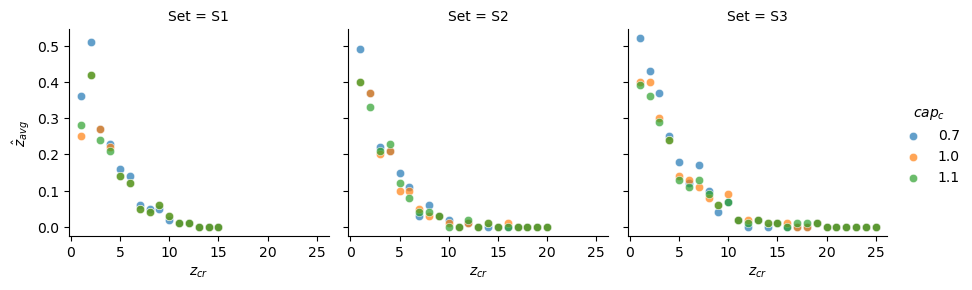

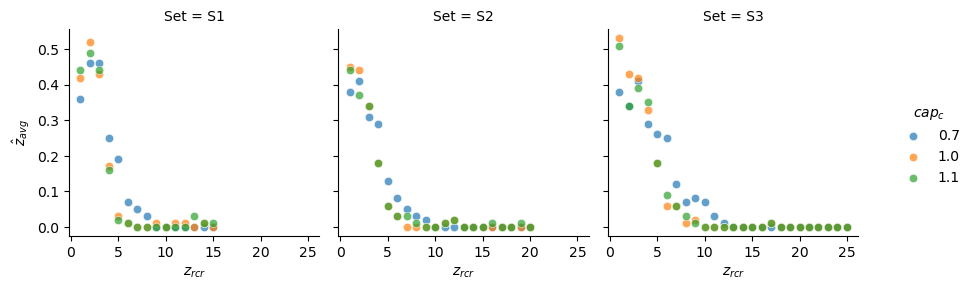

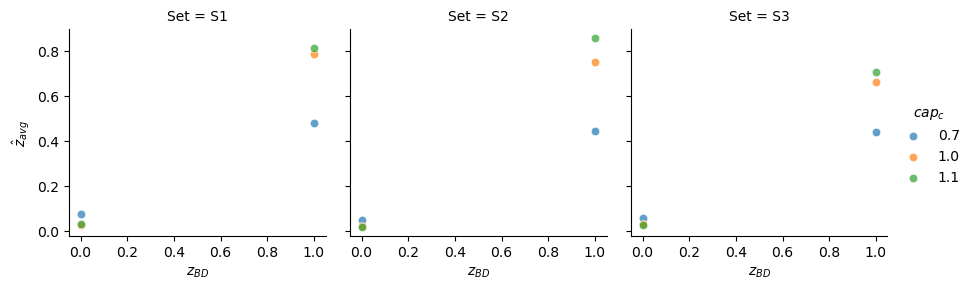

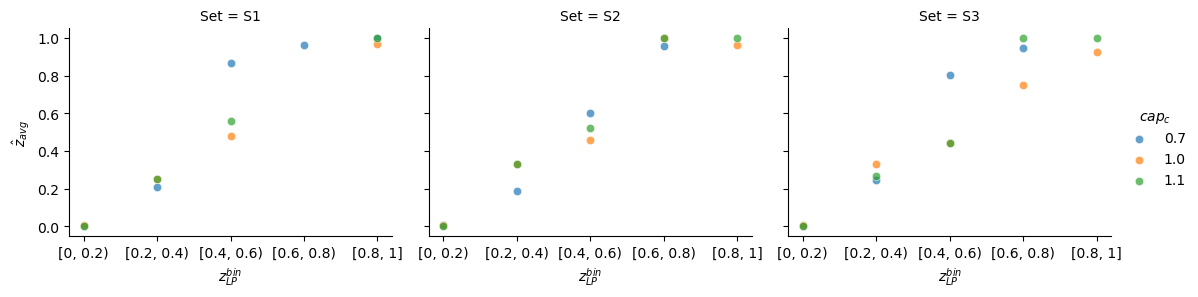

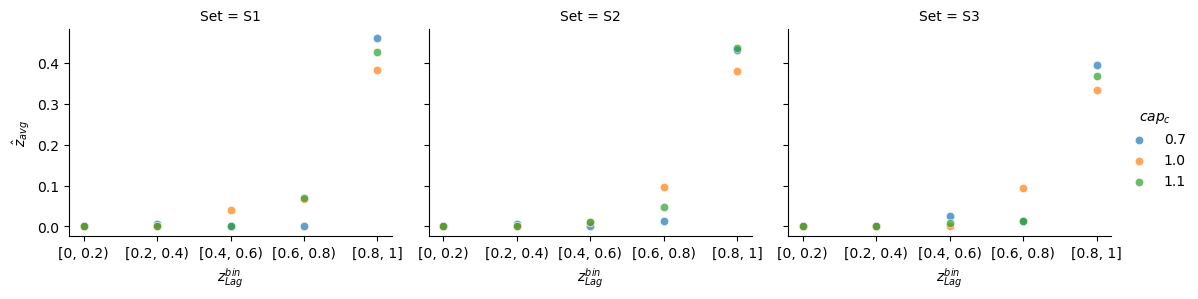

In [4]:

ZdataAVG3 = Zdata.groupby(['Set', 'CRank', 'Cap'])['Optsol'].mean().reset_index()
# Visualization
g3 = sns.FacetGrid(ZdataAVG3, col="Set", hue="Cap")
g3.map(sns.scatterplot, "CRank", "Optsol", alpha=.7)
g3.add_legend(title = '$cap_{c}$')
g3.axes[0,0].set_xlabel('$z_{cr}$')
g3.axes[0,1].set_xlabel('$z_{cr}$')
g3.axes[0,2].set_xlabel('$z_{cr}$')
g3.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g3.savefig("Z1Crank.pdf")

Zdata['RBDRCst_rank'] = Zdata.groupby(['Set', 'ID'])['RBDRCst'].rank(method='first', ascending=True)
# BD reduced costs
ZdataAVG = Zdata.groupby(['Set', 'RBDRCst_rank', 'Cap'])['Optsol'].mean().reset_index()
# Visualization
g = sns.FacetGrid(ZdataAVG, col="Set", hue="Cap", margin_titles=True)
g.map(sns.scatterplot, "RBDRCst_rank", "Optsol", alpha=.7)
g.add_legend(title = '$cap_{c}$')
g.axes[0,0].set_xlabel('$z_{rcr}$')
g.axes[0,1].set_xlabel('$z_{rcr}$')
g.axes[0,2].set_xlabel('$z_{rcr}$')
g.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g.savefig("Z2RDR.pdf")


ZdataAVG5 = Zdata.groupby(['Set', 'BDSol', 'Cap'])['Optsol'].mean().reset_index()
# Visualization
g5 = sns.FacetGrid(ZdataAVG5, col="Set", hue="Cap")
g5.map(sns.scatterplot, "BDSol", "Optsol", alpha=.7)
g5.add_legend(title = '$cap_{c}$')
g5.axes[0,0].set_xlabel('$z_{BD}$')
g5.axes[0,1].set_xlabel('$z_{BD}$')
g5.axes[0,2].set_xlabel('$z_{BD}$')
g5.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g5.savefig("Z3BDsol.pdf")

# LP relaxation
Zdata["LPSolBin"] = Zdata["LPSol"].apply(lambda x: "[0, 0.2)" if x < 0.2 else ("[0.2, 0.4)"  
                                 if x<0.4 else ("[0.4, 0.6)"  if x<0.6 else ("[0.6, 0.8)"  if x<0.8 else "[0.8, 1]" )) ) )
ZdataAVG2 = Zdata.groupby(['Set', 'LPSolBin', 'Cap'])['Optsol'].mean().reset_index()
g2 = sns.FacetGrid(ZdataAVG2, col="Set", hue="Cap", height=3, aspect=1.25)
g2.map(sns.scatterplot, "LPSolBin", "Optsol", alpha=.7)
g2.add_legend(title = '$cap_{c}$')
g2.axes[0,0].set_xlabel('$z_{LP}^{bin}$')
g2.axes[0,1].set_xlabel('$z_{LP}^{bin}$')
g2.axes[0,2].set_xlabel('$z_{LP}^{bin}$')
g2.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g2.savefig("Z4LPSol.pdf")


# Lag relaxation
Zdata["LagSolBin"] = Zdata["LagSol"].apply(lambda x: "[0, 0.2)" if x < 0.2 else ("[0.2, 0.4)"  
                                 if x<0.4 else ("[0.4, 0.6)"  if x<0.6 else ("[0.6, 0.8)"  if x<0.8 else "[0.8, 1]" )) ) )
ZdataAVG4 = Zdata.groupby(['Set', 'LagSolBin', 'Cap'])['Optsol'].mean().reset_index()
g4 = sns.FacetGrid(ZdataAVG4, col="Set", hue="Cap", height=3, aspect=1.25)
g4.map(sns.scatterplot, "LagSolBin", "Optsol", alpha=.7)
g4.add_legend(title = '$cap_{c}$')
g4.axes[0,0].set_xlabel('$z_{Lag}^{bin}$')
g4.axes[0,1].set_xlabel('$z_{Lag}^{bin}$')
g4.axes[0,2].set_xlabel('$z_{Lag}^{bin}$')
g4.axes[0,0].set_ylabel('$\hat{z}_{avg}$')
g4.savefig("Z5Lagbin.pdf")



In [5]:
################################################# Random Forest DECISION TREE MODELING #######################################################
######################################################################################################################################
Zdata["RC_rank_pct"] = Zdata.apply(lambda x: x['RBDRCst_rank']/15 if x['Set'] == "S1" 
                                    else (x['RBDRCst_rank']/20 if x['Set'] == "S2" else x['RBDRCst_rank']/25), axis=1)
Zdata["RC_rank_pct_round"] = Zdata["RC_rank_pct"].round(1)
Zdata["C_rank_pct"] = Zdata.apply(lambda x: x['CRank']/15 if x['Set'] == "S1" 
                                    else (x['CRank']/20 if x['Set'] == "S2" else x['CRank']/25), axis=1)
Zdata["C_rank_pct_round"] = Zdata["C_rank_pct"].round(1)
Zdata["RC_rank_pct_round"] = np.where(Zdata["RC_rank_pct_round"] >= 0.5, 0.5, Zdata["RC_rank_pct_round"] )
Zdata["C_rank_pct_round"] = np.where(Zdata["C_rank_pct_round"] >= 0.5, 0.5, Zdata["C_rank_pct_round"] )

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib  # To save the model

def RandomForestdecisiontree(Zdata):
    if (Zdata["Cap"] == 0.7).any():
        X = Zdata[['LPSol', 'LagSol', 'C_rank_pct_round']]
        cap_value = 0.7
    elif (Zdata["Cap"] == 1.0).any():
        X = Zdata[['LPSol', 'LagSol', 'BDSol', 'RC_rank_pct_round']]
        cap_value = 1.0
    else:
        X = Zdata[['LPSol', 'BDSol', 'C_rank_pct_round']]
        cap_value = 1.1
    y = Zdata['Optsol']
    
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing for numerical data: Scaling
    numerical_transformer = StandardScaler()

    # Preprocessing for categorical data: OneHotEncoding
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Create the base model (Random Forest)
    rf = RandomForestClassifier(random_state=42)

    # Define a pipeline with preprocessing and the random forest classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', rf)])

    # Set up the hyperparameter grid for tuning
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],         # Number of trees in the forest
        'classifier__max_depth': [3, 5, 10, None],          # Maximum depth of the tree
        'classifier__min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
        'classifier__min_samples_leaf': [1, 2, 5],          # Minimum samples required at a leaf node
        'classifier__criterion': ['gini', 'entropy']        # Criterion for splitting nodes
    }

    # Set up the GridSearchCV to tune the hyperparameters using cross-validation
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the grid search to find the best parameters
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best Hyperparameters: ", grid_search.best_params_)

    # Make predictions for likelihood (probabilities)
    y_pred_proba = grid_search.predict_proba(X_test)

    # Convert predicted probabilities to a DataFrame
    # Assuming binary classification, you'll have two probability columns (Prob_class_0, Prob_class_1)
    y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=['Prob_class_0', 'Prob_class_1'])

    # Export the predicted probabilities to an Excel file
    y_pred_proba_df.to_excel(f'rf_tuned_probabilities_cap_{cap_value}.xlsx', index=False)
    print(f'Predicted probabilities exported to rf_tuned_probabilities_cap_{cap_value}.xlsx')

    # Save the best model to a file
    model_filename = f'rf_tuned_model_cap_{cap_value}.pkl'
    joblib.dump(grid_search.best_estimator_, model_filename)
    print(f"Best model for Cap {cap_value} saved as '{model_filename}'")    
    
    # Optionally, evaluate the accuracy using the class predictions (if desired)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with tuned hyperparameters: {accuracy:.2f}")    
    
ZdataLowCap = Zdata.loc[Zdata["Cap"] == 0.7]
RandomForestdecisiontree(ZdataLowCap)

ZdataMediumCap = Zdata.loc[Zdata["Cap"] == 1.0]
RandomForestdecisiontree(ZdataMediumCap)

ZdataHighCap = Zdata.loc[Zdata["Cap"] == 1.1]
RandomForestdecisiontree(ZdataHighCap)


Best Hyperparameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Predicted probabilities exported to rf_tuned_probabilities_cap_0.7.xlsx
Best model for Cap 0.7 saved as 'rf_tuned_model_cap_0.7.pkl'
Accuracy with tuned hyperparameters: 0.96
Best Hyperparameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Predicted probabilities exported to rf_tuned_probabilities_cap_1.0.xlsx
Best model for Cap 1.0 saved as 'rf_tuned_model_cap_1.0.pkl'
Accuracy with tuned hyperparameters: 0.98
Best Hyperparameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Predicted probabilities exported to rf_tuned_probabilities_cap_1.1.xlsx
Best model f